Initial Project Idea from:

https://elitedatascience.com/python-machine-learning-tutorial-scikit-learn#step-2

Load required libraries

In [1]:
from __future__ import print_function, division

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib #alternative to pickling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.dummy import DummyClassifier
import seaborn as sns
import statsmodels.api as sm
import cpi

%matplotlib inline

Load red and white wine data from remote URL

In [2]:
requests.__path__

dataset_url_red = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data_red = pd.read_csv(dataset_url_red)

dataset_url_white = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
data_white = pd.read_csv(dataset_url_white)

#response = requests.get(dataset_url)
#response.status_code

Run "diagnostics" for reds

In [3]:
data_red = pd.read_csv(dataset_url_red, sep=';')#csv is actually separated by semicolons

In [4]:
data_red['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [5]:
data_red.shape

(1599, 12)

In [6]:
data_red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
data_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
data_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
data_red.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [10]:
#sns.set(font_scale = 1)
#sns.pairplot(data_red, palette = 'coolwarm');

First Glance Notes:
    -Lots of pairs of uncorrelated random varianbls.  Goody!!!!
    -No multimodality
    -couple outliers to be accounted for
    -citric acid is intersting, binning issue?
    

Run "diagnostics" for whites

In [11]:
data_white = pd.read_csv(dataset_url_white, sep=';')#csv is actually separated by semicolons

In [12]:
data_white.shape

(4898, 12)

In [13]:
data_white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [14]:
data_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [15]:
data_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [16]:
data_white['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [17]:
data_white.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [18]:
#sns.set(font_scale=1)
#sns.pairplot(data_white, palette = 'coolwarm');

First glance notes:

Similar to reds, with whites there appears to be a negative correlation between density and alcohol if D is H, a is low if a is h desity is low.  
There is one outlier at 2781.

In [19]:
data_white.loc[data_white.density >1.03]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2781,7.8,0.965,0.6,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6


In [20]:
data_white.drop(data_white.index[2781]) #remove outlier note length s/b 4897

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6


In [21]:
#Ad a column to each file to classify redness
data_red["redness"] = 1
data_white["redness"] = 0

#Create a new dataframe with both table of whitesand table of reds
data = data_red.append(data_white)

In [22]:
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,redness
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


In [23]:
data.tail(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,redness
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [24]:
#data.rename(index = str).index

In [25]:
data.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,redness
0,0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,1
1,1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5,1
2,2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5,1
3,3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6,1
4,4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,1
5,5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5,1
6,6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5,1
7,7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7,1
8,8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7,1
9,9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,1


Above shows an extra column after re-indexing, below shows it appears to have worked

In [26]:
#data = data.drop(columns = ['index'])


In [27]:
data.to_csv('combined_wine.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,redness
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [28]:
data.shape

(6497, 13)

In [1]:
data.quality.value_counts()

NameError: name 'data' is not defined

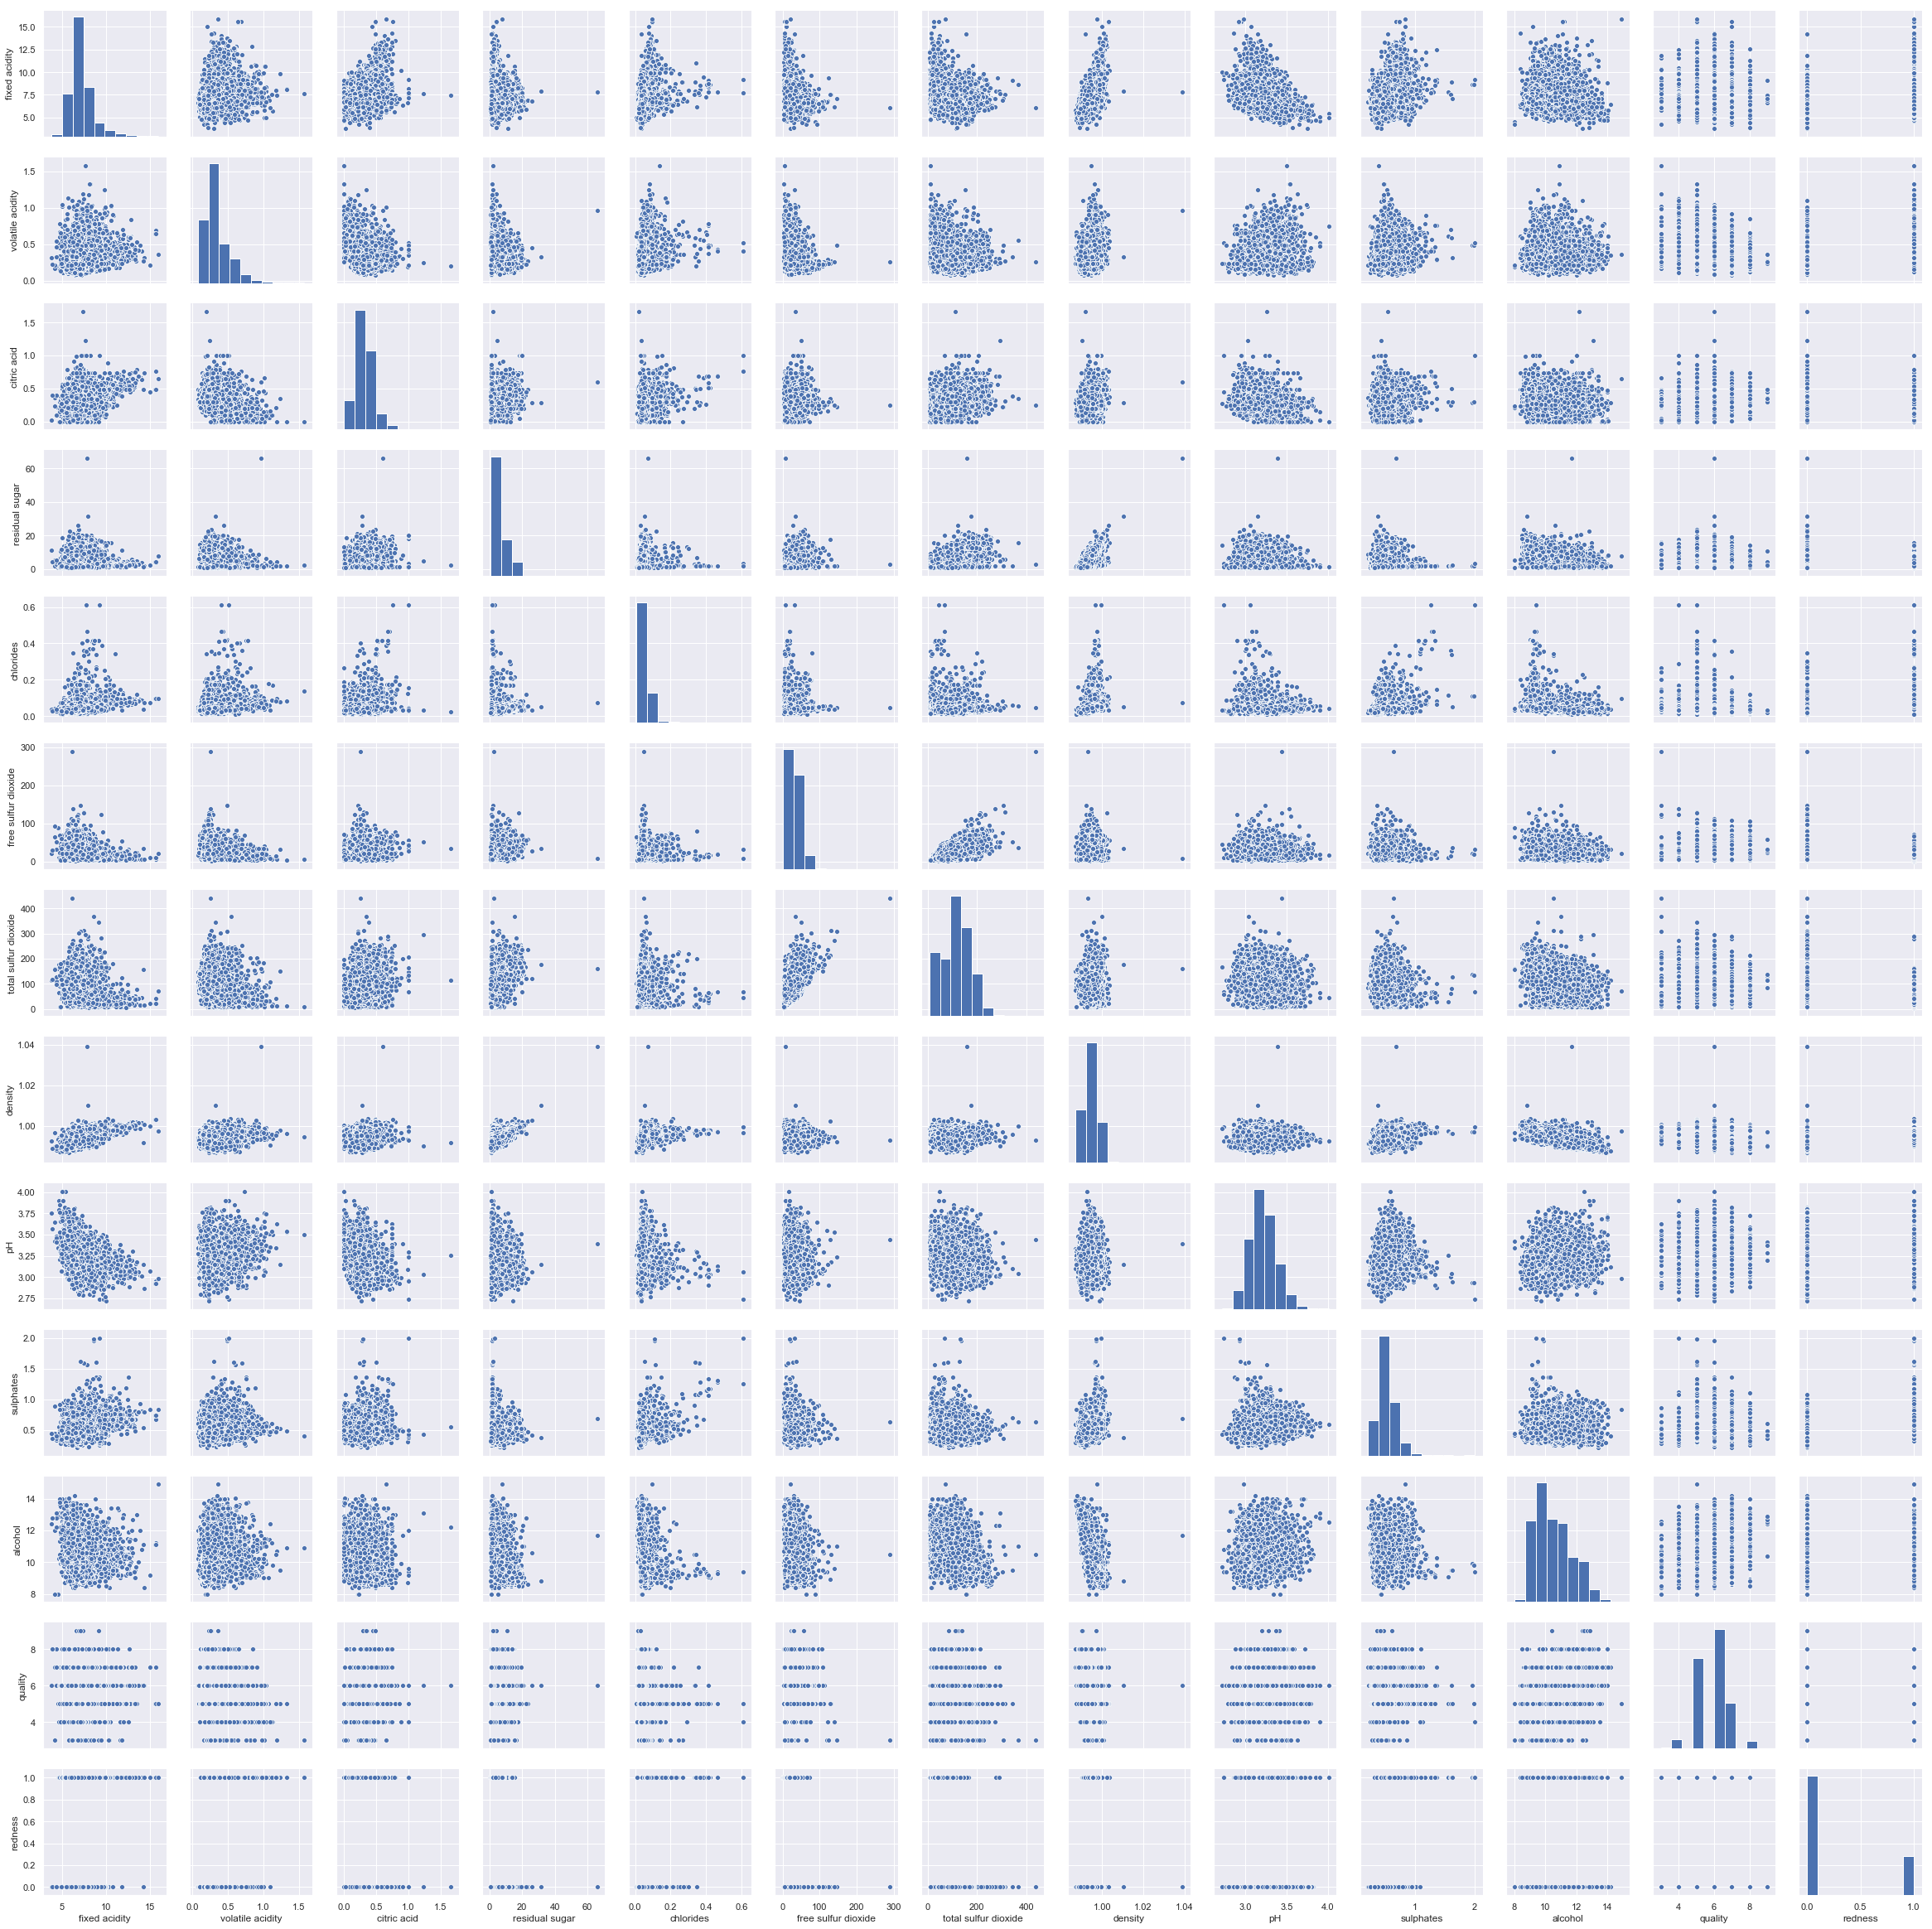

In [29]:
#sns.set(font_scale=1)
#sns.pairplot(data, palette = 'coolwarm');

In [30]:
#
clf = LogisticRegression(random_state = 0, solver = 'lbfgs', multi_class = 'multinomial', max_iter = 10000 )
X = data.drop(['redness'], axis = 1)
y = data.redness
fit = clf.fit(sm.add_constant(X), y)
print(fit)

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)


C inverse of regularazion strength which is 1/alpha
Class_weight of None means that no individual parameter is given any weight
dual = False 
fit_intercept True: Intercept = False is the default for Linear Regression when using dummy vars. Since not using dummy vars at this point, set to here to True
multi_class = multinomial recall that when there are only 2 choices, multinomial is the same as binomial
n_jobs = w/b used if using multi-cor processing
penalty = 'l2'note that this is L2 or L^2 penalty which is ridge regression. Could set to elastic-net, or some other setting.  Will use L1 and elastic net as project progresses 
verbose means no diagnostic print statements generated resulting in faster run time
warm start = storing internally each time it is executed and will take the best fit from the last time run as starting point.  C/B good or bad!!! Since warm is false don't need to worry about that now.

In [31]:
fit.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 10000,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [32]:
preds = fit.predict_proba(sm.add_constant(X)) #returns predictions of red and white!
y_preds = preds[:,1]

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [33]:
y_preds

array([9.99529750e-01, 9.99220609e-01, 9.98439724e-01, ...,
       1.93184665e-03, 5.68278796e-04, 6.74863217e-04])

In [34]:
y_preds_rounded = np.round(y_preds, 0)

In [35]:
#y_preds_rounded == y
y.iloc[:0]
y.head()
type(y)
y_as_array = [x for x in y]

In [36]:
sum(y_as_array != y_preds_rounded) #returns error rate. 85 missclassified 

85

In [37]:
y_preds

array([9.99529750e-01, 9.99220609e-01, 9.98439724e-01, ...,
       1.93184665e-03, 5.68278796e-04, 6.74863217e-04])

In [38]:
fit.coef_

array([[ 0.02843341,  0.61902487,  4.92295773, -0.24310537, -0.05702377,
         2.74707311,  0.02342749, -0.02956762,  0.23559253,  3.50843745,
         3.60821839, -0.26107047, -0.01242355]])

In [39]:
sm.add_constant(X).head()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1.0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,1.0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,1.0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,1.0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [40]:
logit = sm.Logit(y,sm.add_constant(X))
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.032649
         Iterations 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                redness   No. Observations:                 6497
Model:                          Logit   Df Residuals:                     6484
Method:                           MLE   Df Model:                           12
Date:                Thu, 25 Jul 2019   Pseudo R-squ.:                  0.9415
Time:                        14:54:12   Log-Likelihood:                -212.12
converged:                       True   LL-Null:                       -3625.5
                                        LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1875.9575    186.804    -10.042      0.000   -2242.088   -1509.828
fixed acidity           -0.4005      0.233     -1.716      0.086      -0.858       0.057
volatile acidity         6.7220      1.061      6.337      0.000       4.643       8.801
citric acid             -2.6172      1.185     -2.209      0.027      -4.939      -0.295
residual sugar          -0.9562      0.101     -9.448      0.000      -1.155      -0.758
chlorides               22.0115      3.985      5.524      0.000      14.202      29.821
free sulfur dioxide      0.0608      0.015      4.176      0.000       0.032       0.089
total sulfur dioxide    -0.0523      0.005    -10.479      0.000      -0.062      -0.043
density               1875.0427    190.443      9.846      0.000    1501.781    2248.304
pH                      -1.9593      1.424     -1.376      0.169      -4.751       0.832
sulphates                2.6927      1.249      2.156      0.031       0.245       5.141
alcohol                  1.7921      0.280      6.412      0.000       1.244       2.340
quality                  0.4339      0.204      2.126      0.034       0.034       0.834
========================================================================================

Possibly complete quasi-separation: A fraction 0.25 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

TO DO:
1. train / test split
2. cross validate
3. feature select
4. need to run SQL
5. 0 center unit variance predictors
6. run AWS

In [41]:
#starting at the level of data as the complete set of training and testing data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,redness
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [42]:
#randomize the rows to ensure no order dependence in the model
rawdata = data
data = rawdata.sample(frac = 1)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,redness
658,7.2,0.52,0.07,1.40,0.074,5.0,20.0,0.99730,3.32,0.81,9.6,6,1
3490,7.6,0.31,0.24,1.80,0.037,39.0,150.0,0.99130,3.05,0.44,11.8,7,0
2922,6.5,0.44,0.47,5.45,0.014,44.0,137.0,0.98984,3.13,0.32,13.0,8,0
722,7.6,0.42,0.08,2.70,0.084,15.0,48.0,0.99680,3.21,0.59,10.0,5,1
2766,6.9,0.16,0.37,1.80,0.034,36.0,95.0,0.98952,2.93,0.59,12.0,6,0


In [43]:
X = data.drop(['redness'], axis = 1)
y = data.redness

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [45]:
logit = sm.Logit(y_train,sm.add_constant(X_train))
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.028635
         Iterations 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                redness   No. Observations:                 5197
Model:                          Logit   Df Residuals:                     5184
Method:                           MLE   Df Model:                           12
Date:                Thu, 25 Jul 2019   Pseudo R-squ.:                  0.9482
Time:                        14:54:13   Log-Likelihood:                -148.81
converged:                       True   LL-Null:                       -2870.5
                                        LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1831.1529    212.798     -8.605      0.000   -2248.228   -1414.077
fixed acidity           -0.2445      0.274     -0.893      0.372      -0.781       0.292
volatile acidity         6.9869      1.256      5.562      0.000       4.525       9.449
citric acid             -3.2146      1.338     -2.402      0.016      -5.837      -0.592
residual sugar          -1.0741      0.127     -8.441      0.000      -1.323      -0.825
chlorides               23.5723      4.602      5.122      0.000      14.553      32.592
free sulfur dioxide      0.0754      0.017      4.420      0.000       0.042       0.109
total sulfur dioxide    -0.0620      0.007     -9.503      0.000      -0.075      -0.049
density               1827.5242    217.131      8.417      0.000    1401.956    2253.093
pH                      -0.7725      1.674     -0.461      0.645      -4.054       2.509
sulphates                4.3449      1.482      2.931      0.003       1.440       7.250
alcohol                  1.6412      0.320      5.135      0.000       1.015       2.268
quality                  0.2324      0.237      0.982      0.326      -0.231       0.696
========================================================================================

Possibly complete quasi-separation: A fraction 0.39 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [46]:

result.params
type(result.params)
params = [x for x in result.params]
params

[-1831.1528633159505,
 -0.24448809746112077,
 6.9868690518203245,
 -3.214602501000474,
 -1.0740698997159182,
 23.57226565837923,
 0.07543636417345811,
 -0.06198161856090827,
 1827.5241659909948,
 -0.7724599128406215,
 4.3449027778887634,
 1.641203874696548,
 0.23242216757018366]

In [47]:
test_preds = logit.predict(params, sm.add_constant(X_test))
test_preds_rounded = np.round(test_preds)
E_out = sum(test_preds_rounded != y_test)/X_test.shape[0]
print("E_out = ", E_out) #error rate

E_out =  0.004615384615384616


In [48]:
train_preds = logit.predict(params, sm.add_constant(X_train))
train_preds_rounded = np.round(train_preds)
E_in = sum(train_preds_rounded != y_train)/X_train.shape[0]
print("E_in = ", E_in) #error rate

E_in =  0.005964979796036175


In [49]:
#.3% error in sample 